In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tenki = pd.read_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/tenki.csv")
df_kyaku = pd.read_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/kyaku.csv")
df_train = pd.read_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/train.csv")
df_uriage = pd.read_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/uriage.csv")

In [3]:
# 日付のフォーマット調整
df_train['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_uriage['nichi'] = pd.to_datetime(df_uriage['nichi'], format='%Y%m%d')
df_kyaku['nichi'] = pd.to_datetime(df_kyaku['nichi'], format='%Y%m%d')
df_tenki['nichi'] = pd.to_datetime(df_tenki['nichi'], format='%Y%m%d')

In [4]:
# 客の表と、売上表を店舗ごとに分割
df_kyaku_x = df_kyaku[df_kyaku["group_mise"]=="X"].reset_index(drop=True).rename(columns={'kyaku_param':'kyaku_param_x'})
df_kyaku_y = df_kyaku[df_kyaku["group_mise"]=="Y"].reset_index(drop=True).rename(columns={'kyaku_param':'kyaku_param_y'})
df_kyaku_z = df_kyaku[df_kyaku["group_mise"]=="Z"].reset_index(drop=True).rename(columns={'kyaku_param':'kyaku_param_z'})
df_uriage_x = df_uriage[df_uriage["group_mise"]=="X"].reset_index(drop=True).rename(columns={'uriage_param':'uriage_param_x'})
df_uriage_y = df_uriage[df_uriage["group_mise"]=="Y"].reset_index(drop=True).rename(columns={'uriage_param':'uriage_param_y'})
df_uriage_z = df_uriage[df_uriage["group_mise"]=="Z"].reset_index(drop=True).rename(columns={'uriage_param':'uriage_param_z'})

In [5]:
# 売上表にある日付を取得
nichi = df_uriage['nichi'].unique()

In [6]:
# 天気表から、売上表にある日付のみ抽出
df_tenki_ext = df_tenki[df_tenki['nichi'].isin(nichi)].reset_index(drop=True)

In [7]:
df_tenki_ftr = df_tenki_ext[['kion_ave','kousuiryou','kousuiryou_jikan']]

In [8]:
df_kyaku_xyz = pd.concat([df_kyaku_x['kyaku_param_x'],df_kyaku_y['kyaku_param_y'],df_kyaku_z['kyaku_param_z']],axis=1)
df_uriage_xyz = pd.concat([df_uriage_x['uriage_param_x'],df_uriage_y['uriage_param_y'],df_uriage_z['uriage_param_z']],axis=1)

In [9]:
# 特徴量として使えそうな項目を連結して1つの表にまとめる
df_ftr = pd.concat([df_tenki_ftr,df_kyaku_xyz,df_uriage_xyz],axis=1)

In [10]:
# 列同士の相関をとる
df_ftr_corr = df_ftr.corr()

<AxesSubplot:>

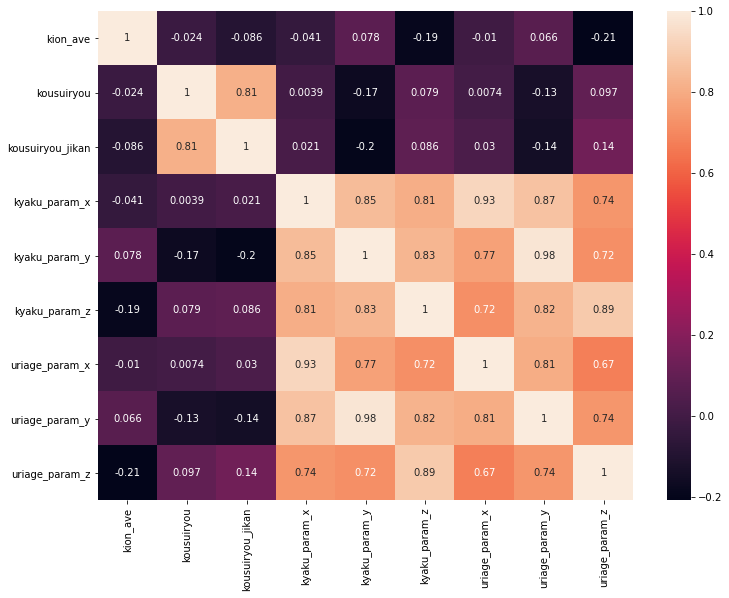

In [11]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_ftr_corr, annot=True)

### メモ
* 平均気温と客数・売り上げのパラメータとの相関は低い
* 降水量と降水時間の相関は高い→特徴量に使うなら、どちらか一方で良い
* 来客数と売り上げのパラメータ同士は、相関が高い（直感に合っている）→特徴量に使うなら、どちらか一方で良いかも

In [12]:
df_train_all = [df_train[(df_train["group_mise"]=="X") & (df_train["group_item"]=="A")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_xa'})]
df_train_all.append(df_train[(df_train["group_mise"]=="X") & (df_train["group_item"]=="B")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_xb'}))
df_train_all.append(df_train[(df_train["group_mise"]=="X") & (df_train["group_item"]=="C")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_xc'}))
df_train_all.append(df_train[(df_train["group_mise"]=="X") & (df_train["group_item"]=="D")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_xd'}))
df_train_all.append(df_train[(df_train["group_mise"]=="X") & (df_train["group_item"]=="E")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_xe'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Y") & (df_train["group_item"]=="A")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_ya'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Y") & (df_train["group_item"]=="B")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_yb'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Y") & (df_train["group_item"]=="C")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_yc'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Y") & (df_train["group_item"]=="D")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_yd'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Y") & (df_train["group_item"]=="E")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_ye'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Z") & (df_train["group_item"]=="A")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_za'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Z") & (df_train["group_item"]=="B")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_zb'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Z") & (df_train["group_item"]=="C")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_zc'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Z") & (df_train["group_item"]=="D")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_zd'}))
df_train_all.append(df_train[(df_train["group_mise"]=="Z") & (df_train["group_item"]=="E")][['nichi','target']].reset_index(drop=True).rename(columns={'target':'target_ze'}))

### メモ
* 店舗によって、休みの日が異なる（例：2018/04/21は、Z店だけ営業しており、商品Aだけ2つ売れている）
* 日によって、データのない商品がある（売れた数が0ってことかも）

In [13]:
df_train_ext = pd.merge(df_train_all[0],df_train_all[1],on='nichi',how='outer')
for i in range(2,15):
    df_train_ext = pd.merge(df_train_ext, df_train_all[i],on='nichi',how='outer')
df_train_ext = df_train_ext.drop(542)

In [14]:
# 一部の項目がNULLになっている行があるので、それを一旦除外
df_train_ext_notNull = df_train_ext.dropna(how='any').reset_index(drop=True)

In [15]:
# train表にある日付を取得
nichi_train = df_train_ext_notNull['nichi'].unique()

In [16]:
# 天気表から、売上表にある日付のみ抽出
df_tenki_train_ext = df_tenki[df_tenki['nichi'].isin(nichi_train)].reset_index(drop=True)

In [17]:
df_tenki_train_ftr = df_tenki_train_ext[['kion_ave','kousuiryou','kousuiryou_jikan']]

In [18]:
df_train_all = pd.concat([df_train_ext_notNull,df_tenki_train_ftr],axis=1)

In [19]:
df_train_all = df_train_all.drop('nichi', axis=1)

<AxesSubplot:>

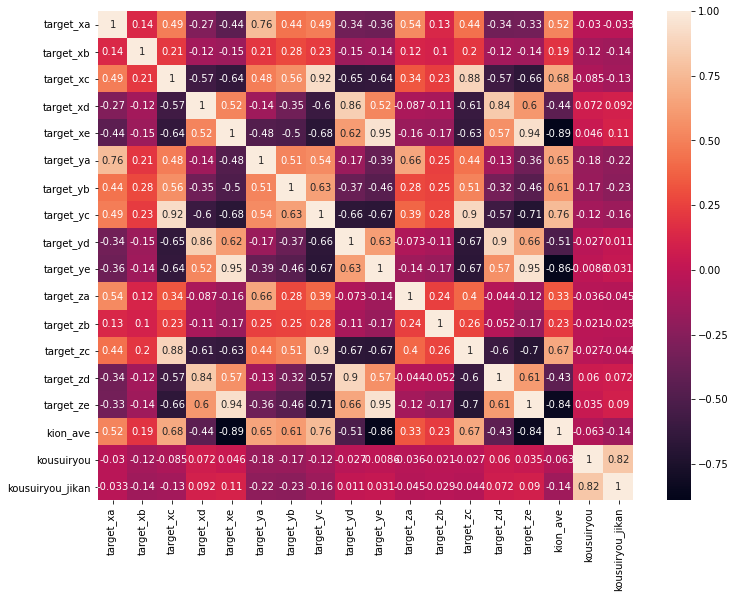

In [20]:
# 商品販売個数と天気の関係を商品種別ごとに調べる
df_train_all_corr = df_train_all.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train_all_corr, annot=True)

### メモ
* 平均気温が高いと、AやCの販売個数が多く、逆にDやEの販売個数が少ない傾向にある→平均気温は、販売個数予測に重要な特徴量の一つと言って良い
* 降水量は、商品の販売個数との相関がほぼない→特徴量から外して良いと思われる

In [21]:
df_train_x = df_train_ext_notNull[['nichi','target_xa','target_xb','target_xc','target_xd','target_xe']]
df_train_y = df_train_ext_notNull[['nichi','target_ya','target_yb','target_yc','target_yd','target_ye']]
df_train_z = df_train_ext_notNull[['nichi','target_za','target_zb','target_zc','target_zd','target_ze']]

In [22]:
df_kyaku_train_x = df_kyaku_x[df_kyaku_x['nichi'].isin(nichi_train)].reset_index(drop=True)
df_kyaku_train_y = df_kyaku_y[df_kyaku_y['nichi'].isin(nichi_train)].reset_index(drop=True)
df_kyaku_train_z = df_kyaku_z[df_kyaku_z['nichi'].isin(nichi_train)].reset_index(drop=True)
df_uriage_train_x = df_uriage_x[df_uriage_x['nichi'].isin(nichi_train)].reset_index(drop=True)
df_uriage_train_y = df_uriage_y[df_uriage_y['nichi'].isin(nichi_train)].reset_index(drop=True)
df_uriage_train_z = df_uriage_z[df_uriage_z['nichi'].isin(nichi_train)].reset_index(drop=True)

In [23]:
df_all_x = pd.concat([df_train_x,df_kyaku_train_x,df_uriage_train_x],axis=1).drop(['nichi','group_mise'],axis=1)
df_all_y = pd.concat([df_train_y,df_kyaku_train_y,df_uriage_train_y],axis=1).drop(['nichi','group_mise'],axis=1)
df_all_z = pd.concat([df_train_z,df_kyaku_train_z,df_uriage_train_z],axis=1).drop(['nichi','group_mise'],axis=1)

Text(0.5, 1.0, 'Z')

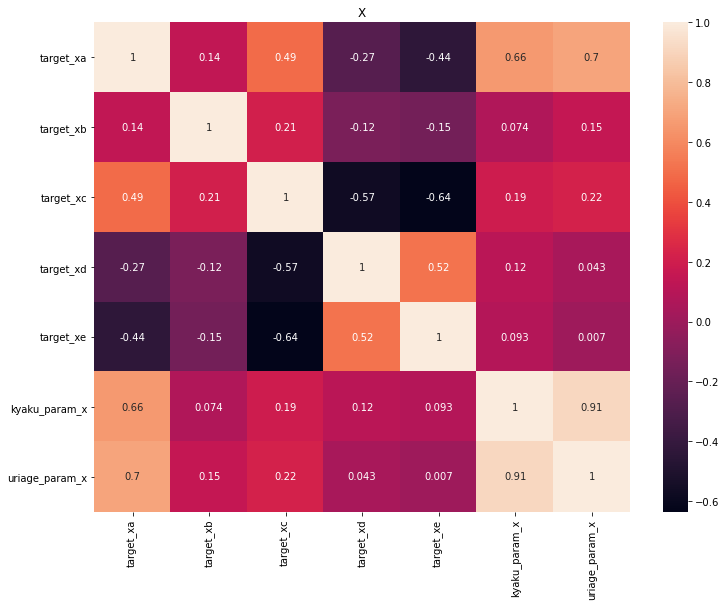

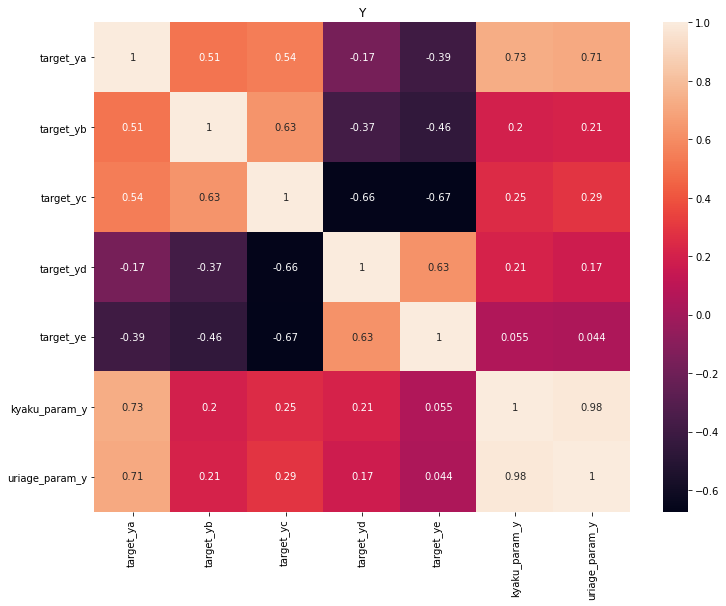

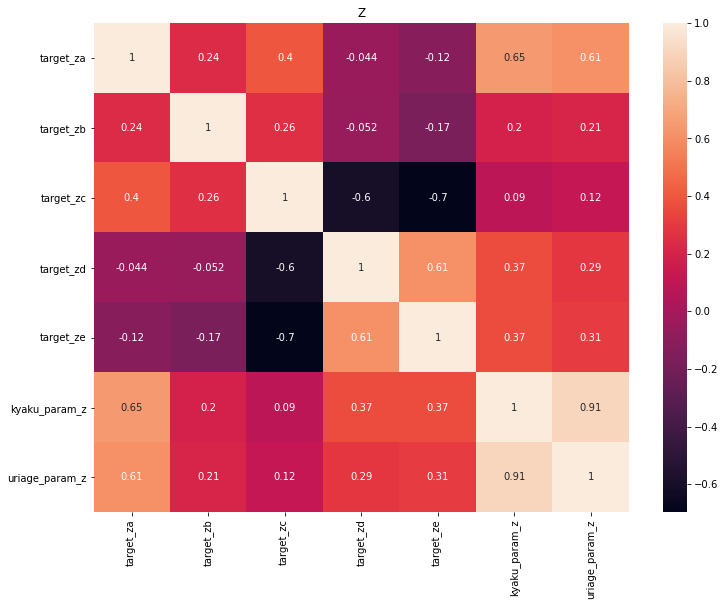

In [24]:
# 店ごとに、商品とkyaku_param、uriage_paramの関係性を調べる
# 店舗X
df_all_x_corr = df_all_x.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_all_x_corr, annot=True)
plt.title('X')
# 店舗Y
df_all_y_corr = df_all_y.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_all_y_corr, annot=True)
plt.title('Y')
# 店舗Z
df_all_z_corr = df_all_z.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_all_z_corr, annot=True)
plt.title('Z')

### メモ
* 商品Aは、kyaku_param、uriage_paramと正の相関あり
* 商品B〜Eは、kyaku_param、uriage_paramとあまり相関なし→謎
* 商品Cの販売個数と、商品D・Eの販売個数に負の相関→商品Cの販売個数予測に商品Dのデータが、商品Dの販売個数予測に商品Cのデータが使えそう

### 以上の分析のまとめ（一旦）
* 平均気温は、販売個数予測にとても重要
* 商品Cの販売個数と、商品D・Eの販売個数に負の相関→Cと、D・Eは類似品（？）　D、Eはセットで買う人が多い商品（？）
* 商品Cの販売個数予測に商品Dのデータが、商品Dの販売個数予測に商品C、Eのデータが使えそう
* 商品Aの販売個数予測には、kyaku_param、uriage_paramが使えそう→来店した人の多くが買うような商品（？）
* A以外の商品の予測にkyaku_param、uriage_paramが使えるかは微妙
* 降水量、降水時間は基本的に使わなくて良いかな

In [26]:
df_all_x

,target_xa,target_xb,target_xc,target_xd,target_xe,kyaku_param_x,uriage_param_x
0,183.0,22.0,8.0,13.0,162.0,0.84590,0.58781
1,177.0,15.0,9.0,9.0,183.0,0.82766,0.59172
2,203.0,14.0,5.0,12.0,142.0,0.85927,0.62048
3,186.0,21.0,4.0,10.0,187.0,0.83040,0.58751
4,166.0,8.0,4.0,18.0,208.0,0.86474,0.61003
...,...,...,...,...,...,...,...
440,50.0,11.0,12.0,3.0,22.0,0.32857,0.22865
441,42.0,13.0,11.0,5.0,22.0,0.29696,0.20700
442,50.0,9.0,13.0,4.0,25.0,0.28875,0.20160
443,40.0,6.0,12.0,7.0,21.0,0.27720,0.18799


### 手法調査メモ
* 季節による周期性がありそうなので、ラグ特徴量を使うと良いかも

## 以降、スルーしてOK

In [30]:
# 月と曜日の列を追加
df_train['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_uriage['nichi'] = pd.to_datetime(df_uriage['nichi'], format='%Y%m%d')
df_kyaku['nichi'] = pd.to_datetime(df_kyaku['nichi'], format='%Y%m%d')
df_tenki['nichi'] = pd.to_datetime(df_tenki['nichi'], format='%Y%m%d')
df_tenki['youbi'] = df_tenki['nichi'].dt.strftime('%a')
df_train['year'] = df_train['nichi'].dt.strftime('%Y')
df_train['month'] = df_train['nichi'].dt.strftime('%m')
df_train['youbi'] = df_train['nichi'].dt.strftime('%a')

In [3]:
df_tenki_corr = df_tenki.corr()

<AxesSubplot:>

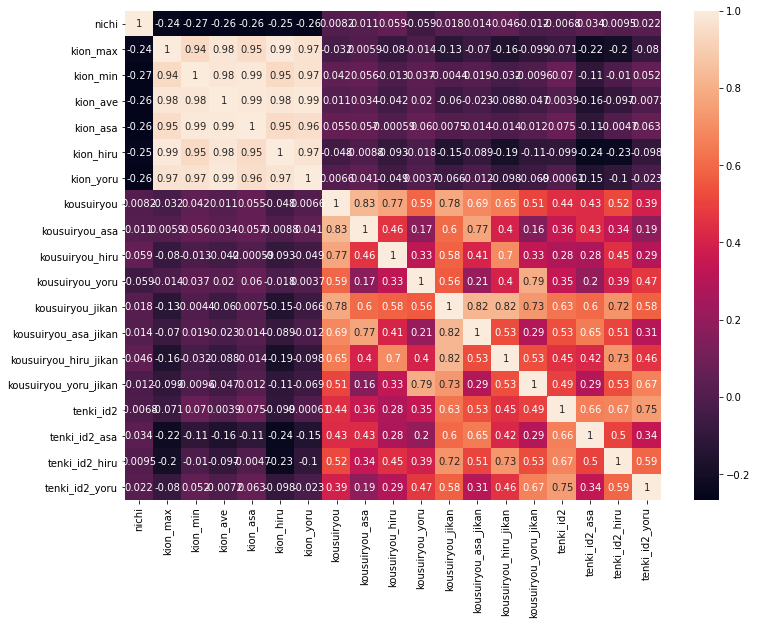

In [4]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_tenki_corr, annot=True)

In [5]:
df_all = pd.concat([df_tenki, df_kyaku, df_uriage], axis=1)

In [6]:
df_all

,nichi,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,...,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru,nichi,group_mise,kyaku_param,nichi,group_mise,uriage_param
0,20180301.0,21.0,7.0,13.0,10.0,17.0,13.0,62.0,62.0,0.0,...,30.0,30.0,10.0,10.0,20180301,X,0.84590,20180301,X,0.58781
1,20180302.0,14.0,6.0,10.0,9.0,13.0,9.0,0.0,0.0,0.0,...,10.0,20.0,10.0,10.0,20180301,Y,0.71245,20180301,Y,0.66051
2,20180303.0,15.0,5.0,10.0,6.0,14.0,12.0,0.0,0.0,0.0,...,20.0,20.0,10.0,20.0,20180301,Z,0.68699,20180301,Z,0.43795
3,20180304.0,20.0,8.0,15.0,11.0,19.0,16.0,0.0,0.0,0.0,...,10.0,20.0,10.0,10.0,20180302,X,0.82766,20180302,X,0.59172
4,20180305.0,18.0,10.0,16.0,16.0,17.0,16.0,38.0,0.0,9.0,...,30.0,20.0,30.0,30.0,20180302,Y,0.66764,20180302,Y,0.64196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20200629,Y,0.52504,20200629,Y,0.48184
1688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20200629,Z,0.46189,20200629,Z,0.30481
1689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20200630,X,0.44681,20200630,X,0.32288
1690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20200630,Y,0.51654,20200630,Y,0.48721


In [17]:
df_all_corr = df_all.corr()

<AxesSubplot:>

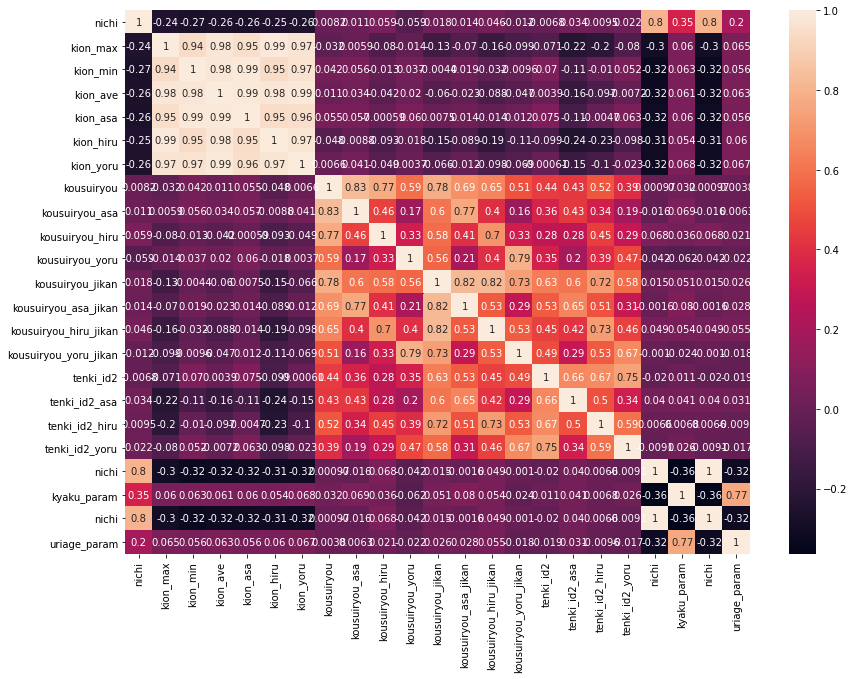

In [18]:
fig, ax = plt.subplots(figsize=(14, 10)) 
sns.heatmap(df_all_corr, annot=True)

In [22]:
df_ext = df_all[["kion_ave","kousuiryou","tenki_id2","kyaku_param","uriage_param"]]

SyntaxError: invalid syntax (<ipython-input-22-e176545cf171>, line 1)

In [21]:
df_ext

,kion_ave,kousuiryou,tenki_id2,kyaku_param,uriage_param
0,13.0,62.0,30.0,0.84590,0.58781
1,10.0,0.0,10.0,0.71245,0.66051
2,10.0,0.0,20.0,0.68699,0.43795
3,15.0,0.0,10.0,0.82766,0.59172
4,16.0,38.0,30.0,0.66764,0.64196
...,...,...,...,...,...
1687,NaN,NaN,NaN,0.52504,0.48184
1688,NaN,NaN,NaN,0.46189,0.30481
1689,NaN,NaN,NaN,0.44681,0.32288
1690,NaN,NaN,NaN,0.51654,0.48721


In [7]:
df_uriage

,nichi,group_mise,uriage_param
0,20180301,X,0.58781
1,20180301,Y,0.66051
2,20180301,Z,0.43795
3,20180302,X,0.59172
4,20180302,Y,0.64196
...,...,...,...
1687,20200629,Y,0.48184
1688,20200629,Z,0.30481
1689,20200630,X,0.32288
1690,20200630,Y,0.48721


In [15]:
df_uriage_X = df_uriage[df_uriage.group_mise=="X"]
df_uriage_Y = df_uriage[df_uriage.group_mise=="Y"]
df_uriage_Z = df_uriage[df_uriage.group_mise=="Z"]

In [16]:
df_uriage_X.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/uriage_X.csv", index=False)
df_uriage_Y.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/uriage_Y.csv", index=False)
df_uriage_Z.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/uriage_Z.csv", index=False)

In [18]:
df_kyaku_X = df_kyaku[df_kyaku.group_mise=="X"]
df_kyaku_Y = df_kyaku[df_kyaku.group_mise=="Y"]
df_kyaku_Z = df_kyaku[df_kyaku.group_mise=="Z"]

In [19]:
df_kyaku_X.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/kyaku_X.csv", index=False)
df_kyaku_Y.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/kyaku_Y.csv", index=False)
df_kyaku_Z.to_csv("/Users/s-suda/Documents/data_analysis/nri_analysis_contest/200_input/kyaku_Z.csv", index=False)

In [20]:
df_kion = df_tenki["kion_ave"]

In [24]:
df_kousuiryou = df_tenki["kousuiryou"]
df_kousuijikan = df_tenki["kousuiryou_jikan"]

In [30]:
df_sam = pd.concat([df_kion,df_kousuiryou,df_kousuijikan,df_uriage_X["uriage_param"],df_uriage_Y["uriage_param"],df_uriage_Z["uriage_param"]],axis=1)

In [31]:
df_sam_corr = df_sam.corr()

<AxesSubplot:>

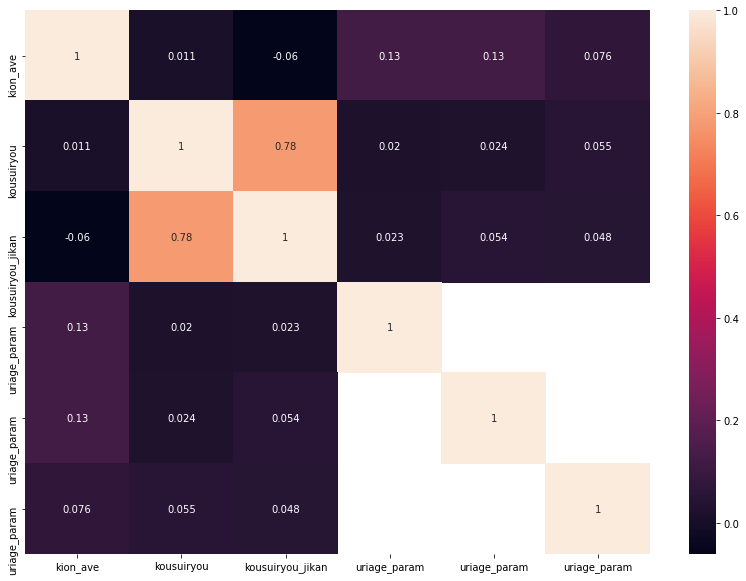

In [32]:
fig, ax = plt.subplots(figsize=(14, 10)) 
sns.heatmap(df_sam_corr, annot=True)